# Presidential Request from the USA government

In [126]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import frange
import seaborn as sb
from matplotlib import rcParams

In [127]:
# Indexing the data
data_path = './data/data_request.xlsx'
data = pd.read_excel(data_path)

In [128]:
# I just view my data
data.head(11)

,President,Year,Total Requests,First-time Requests,Repeat Requests
0,Truman I,1946,41.0,16.0,25.0
1,Truman I,1947,23.0,21.0,2.0
2,Truman I,1948,16.0,6.0,9.0
3,Truman II,1949,28.0,17.0,11.0
4,Truman II,1950,20.0,9.0,11.0
5,Truman II,1951,11.0,5.0,6.0
6,Truman II,1952,19.0,7.0,12.0
7,Eisenhower,1953,14.0,14.0,0.0
8,Eisenhower,1954,39.0,35.0,4.0
9,Eisenhower,1955,32.0,19.0,14.0


#### As Eisenhower's data has NaN values, we need to replaced by 0

In [129]:
# With fillna we can change the value of a Nan by "0"
fill_data = data.fillna(0)
fill_data.head(12)

,President,Year,Total Requests,First-time Requests,Repeat Requests
0,Truman I,1946,41.0,16.0,25.0
1,Truman I,1947,23.0,21.0,2.0
2,Truman I,1948,16.0,6.0,9.0
3,Truman II,1949,28.0,17.0,11.0
4,Truman II,1950,20.0,9.0,11.0
5,Truman II,1951,11.0,5.0,6.0
6,Truman II,1952,19.0,7.0,12.0
7,Eisenhower,1953,14.0,14.0,0.0
8,Eisenhower,1954,39.0,35.0,4.0
9,Eisenhower,1955,32.0,19.0,14.0


##### Ploting the data to look for anr trends or values

Text(0,0.5,'No. Presidential Request')

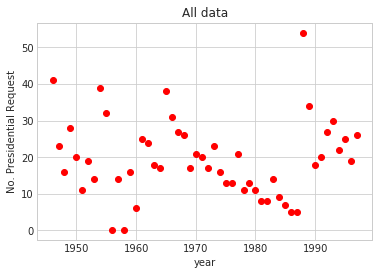

In [130]:
#We need to create the X and Y data for the graph
#NOTE= I use iloc because orther wise I got an error for using 'slice' method
x = fill_data.iloc[:, 1]
y = fill_data.iloc[:, 2]

############Ploting###################
# Configuring the framework
%matplotlib inline
sb.set_style('whitegrid')

# Seting up the plot
plt.close()
plt.figure(1)
#with figure I just enumerate my graphs
plt.title("All data")
plt.plot(x, y, 'ro')
plt.xlabel('year')
plt.ylabel('No. Presidential Request')


### Calculating the percentile values

In [131]:
# Using the method 'describe' I found the percentile statistics
stats = pd.DataFrame(fill_data.describe())
stats

,Year,Total Requests,First-time Requests,Repeat Requests
count,52.000000,52.000000,52.000000,52.000000
mean,1971.500000,19.461538,11.961538,3.403846
std,15.154757,10.626385,9.050970,5.580989
min,1946.000000,0.000000,0.000000,0.000000
25%,1958.750000,13.000000,6.000000,0.000000
50%,1971.500000,18.500000,10.500000,0.000000
75%,1984.250000,25.250000,16.250000,6.500000
max,1997.000000,54.000000,35.000000,25.000000


In [132]:
print(stats.iloc[:, 1])

count    52.000000
mean     19.461538
std      10.626385
min       0.000000
25%      13.000000
50%      18.500000
75%      25.250000
max      54.000000
Name: Total Requests , dtype: float64


In [133]:
# Creating an object to save each percentile of the Label
perc_25_request = stats.iloc[4 , 1]
perc_50_request = stats.iloc[5 , 1]
perc_75_request = stats.iloc[6 , 1]


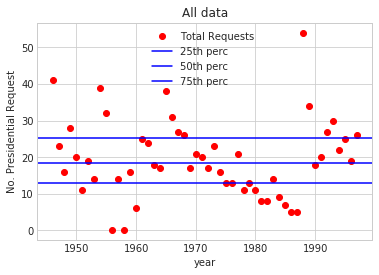

In [134]:
# Seting up the NEW plot
plt.close('all')
#Closing all the graphs
plt.figure(2)
plt.title("All data")
plt.plot(x, y, 'ro')
plt.xlabel('year')
plt.ylabel('No. Presidential Request')
plt.axhline(perc_25_request, label='25th perc', c='b')
plt.axhline(perc_50_request, label='50th perc', c='b')
plt.axhline(perc_75_request, label='75th perc', c='b')
plt.legend(loc='best')
plt.show()

In [135]:
# Looking for the outliers by visual inspection
# ""Removing"" outilers using mask function

# Masking outliers 0
# with masked_where function you can hide the points instead of removing from the data
y_masked = np.ma.masked_where(y==0, y)

# Masking point 54
y_masked = np.ma.masked_where(y_masked==54, y_masked)

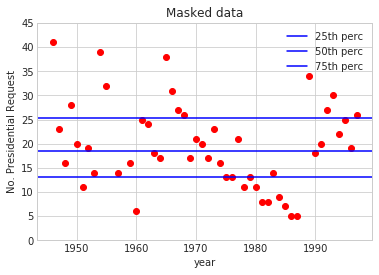

In [136]:
#### Ploting the new plot without outliers
plt.close('all')
plt.figure(3)
plt.title("Masked data")
plt.plot(x, y_masked, 'ro')
plt.xlabel('year')
plt.ylabel('No. Presidential Request')
plt.ylim(0 , 45)
plt.axhline(perc_25_request, label='25th perc', c='b')
plt.axhline(perc_50_request, label='50th perc', c='b')
plt.axhline(perc_75_request, label='75th perc', c='b')
plt.legend(loc='best')
plt.show()

Note = I know that the 0-values were the outliers because I replaced them the Null values by 0-values.

## Grouping the data

In [137]:
# importing other necesary libraries
from collections import Counter
from collections import OrderedDict
from matplotlib.pylab import frange

In [138]:
# Select the data using frecuency
x = fill_data.iloc[:, 1]
y = fill_data.iloc[:, 2]

x_freq = Counter(y)
# Here, Counter conut the no. of each value of "y" y then is assignated to this y-value, is a dict
x_ = np.array(list(x_freq.keys()))
y_ = np.array(list(x_freq.values()))

print(x_freq)

Counter({16.0: 3, 20.0: 3, 11.0: 3, 14.0: 3, 17.0: 3, 13.0: 3, 23.0: 2, 19.0: 2, 0.0: 2, 25.0: 2, 18.0: 2, 27.0: 2, 26.0: 2, 21.0: 2, 8.0: 2, 5.0: 2, 41.0: 1, 28.0: 1, 39.0: 1, 32.0: 1, 6.0: 1, 24.0: 1, 38.0: 1, 31.0: 1, 9.0: 1, 7.0: 1, 54.0: 1, 34.0: 1, 30.0: 1, 22.0: 1})


In [139]:
# Grouping the data
x_group = OrderedDict()
group = 5
group_count = 1
keys = []
values = []
for i, xx in enumerate(x):
    #Individual data point is append
    keys.append(xx)
    values.append(y[i])
    if group_count == group:
        # covnert list of keys to a tuple
        x_group[tuple(keys)] = values
        keys = []
        values = []
        group_count = 0
    
    group_count+=1 
    
x_group[tuple(keys)] = values
print(x_group)

OrderedDict([((1946, 1947, 1948, 1949, 1950), [41.0, 23.0, 16.0, 28.0, 20.0]), ((1951, 1952, 1953, 1954, 1955), [11.0, 19.0, 14.0, 39.0, 32.0]), ((1956, 1957, 1958, 1959, 1960), [0.0, 14.0, 0.0, 16.0, 6.0]), ((1961, 1962, 1963, 1964, 1965), [25.0, 24.0, 18.0, 17.0, 38.0]), ((1966, 1967, 1968, 1969, 1970), [31.0, 27.0, 26.0, 17.0, 21.0]), ((1971, 1972, 1973, 1974, 1975), [20.0, 17.0, 23.0, 16.0, 13.0]), ((1976, 1977, 1978, 1979, 1980), [13.0, 21.0, 11.0, 13.0, 11.0]), ((1981, 1982, 1983, 1984, 1985), [8.0, 8.0, 14.0, 9.0, 7.0]), ((1986, 1987, 1988, 1989, 1990), [5.0, 5.0, 54.0, 34.0, 18.0]), ((1991, 1992, 1993, 1994, 1995), [20.0, 27.0, 30.0, 22.0, 25.0]), ((1996, 1997), [19.0, 26.0])])


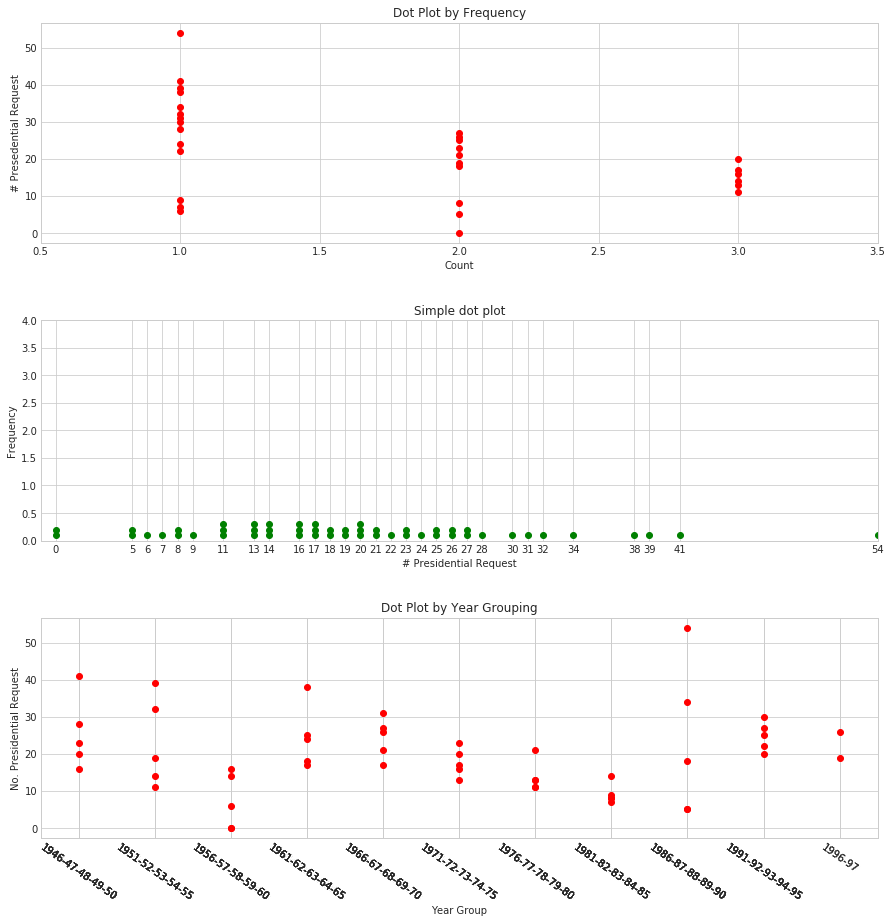

In [186]:
################## Ploting the data as dot plot#######################
plt.close()
plt.figure()
plt.subplots(figsize=(15,15))
#############Ploting frequency
plt.subplot(311)
plt.title("Dot Plot by Frequency")
plt.plot(y_ , x_ , 'ro')
plt.xlabel('Count')
plt.ylabel('# Presedential Request')
### Setting min and max
plt.xlim(min(y_)-0.5 , max(y_)+0.5)

###############Ploting simple dot plot
plt.subplot(312)
plt.title("Simple dot plot")
plt.xlabel('# Presidential Request')
plt.ylabel('Frequency')

# Prepaering the data for a simple dot plot and plotting
for key, value in x_freq.items():
    x__ = np.repeat(key, value)
    y__ = frange(0.1, (value/10.0), 0.1)
    try:
        plt.plot(x__, y__, 'go')
    except ValueError:
        print(x__.shape, y__shape)
    plt.ylim(0.0, 4)
    plt.xlim(xmin = -1)
plt.xticks(list(x_freq.keys()))


#################Ploting Dot plot by Year groping
plt.subplot(313)
x_vals = []
x_labels = []
y_vals = []
x_tick = 1
for k,v in x_group.items():
    for i in range(len(k)):
        x_vals.append(x_tick)
        x_label = '-'.join([str(kk) if not i else str(kk)[-2:] for i,kk in enumerate(k)])
        x_labels.append(x_label)
    y_vals.extend(list(v))
    x_tick +=1

plt.title("Dot Plot by Year Grouping")
plt.xlabel('Year Group')
plt.ylabel('No. Presidential Request')
    
try:
    plt.plot(x_vals, y_vals, 'ro')
except ValueError:
    print( len(x_vals), len(y_vals) )
plt.xticks(list(x_vals), list(x_labels), rotation=-35)
plt.subplots_adjust(hspace=0.35)
plt.show()
